<a href="https://colab.research.google.com/github/Baohikari/Ghouls_Goblins_Ghost_Boo/blob/main/Ghouls_Goblins_Ghost_Boo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mnso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
sample_df = pd.read_csv('/content/sample_submission.csv')

In [ ]:
train_df = pd.read_csv('/content/train.csv')

In [ ]:
test_df = pd.read_csv('/content/test.csv')

In [ ]:
sample_df.head()

,id,type
0,3,Ghost
1,6,Ghost
2,9,Ghost
3,10,Ghost
4,13,Ghost


In [ ]:
train_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [ ]:
test_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [ ]:
train_df.shape

(371, 7)

In [ ]:
test_df.shape

(529, 6)

In [ ]:
train_df['type'].value_counts()

,count
type,
Ghoul,129
Goblin,125
Ghost,117


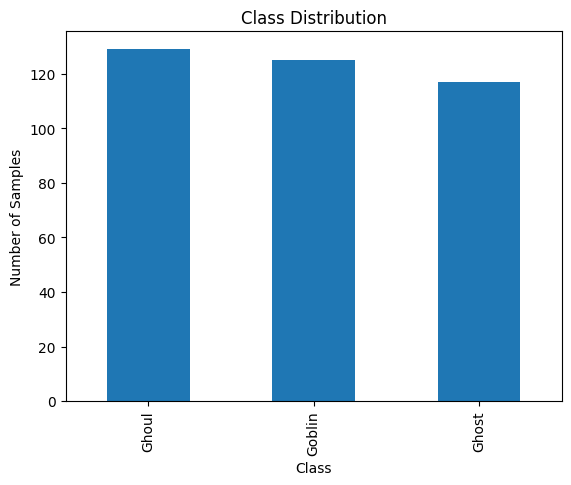

In [ ]:
train_df['type'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

<Axes: >

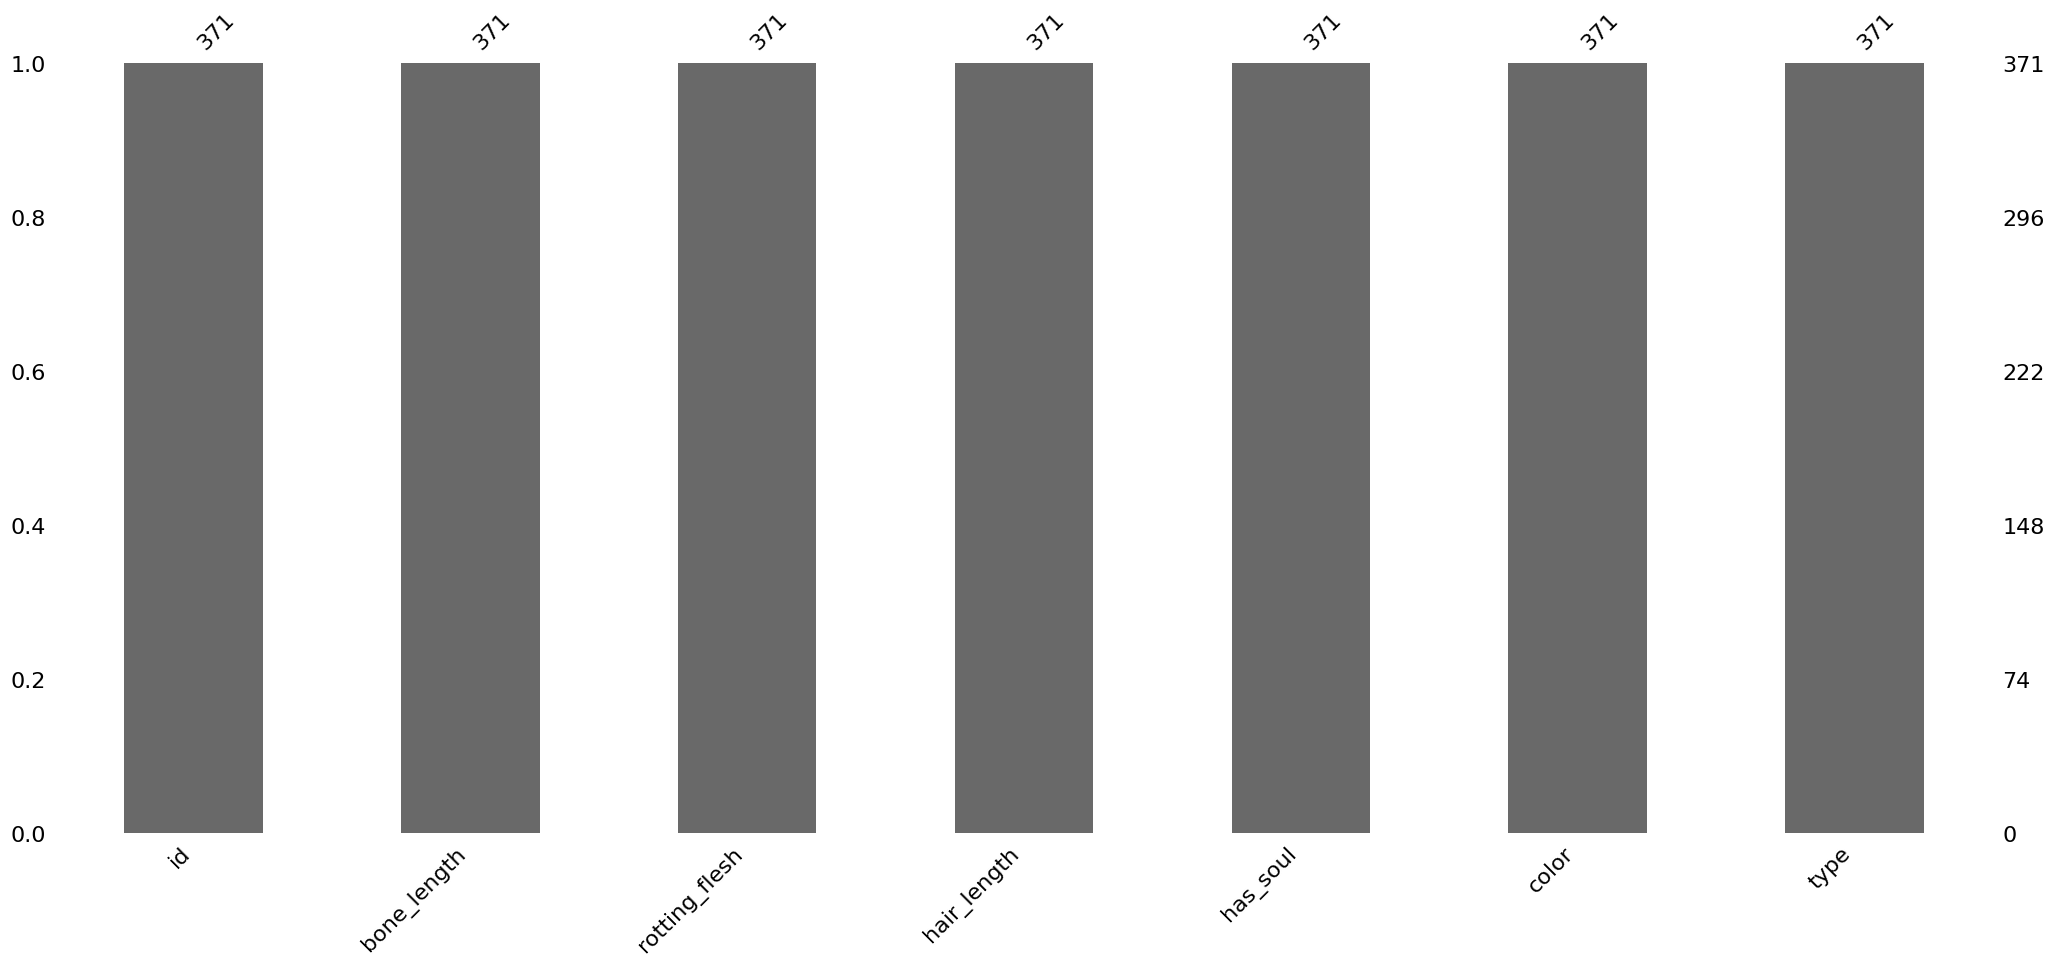

In [ ]:
mnso.bar(train_df)

In [ ]:
le = LabelEncoder()
train_df['type'] = le.fit_transform(train_df['type'])

In [ ]:
train_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,1
1,1,0.575560,0.425868,0.531401,0.439899,green,2
2,2,0.467875,0.354330,0.811616,0.791225,black,1
3,4,0.776652,0.508723,0.636766,0.884464,black,1
4,5,0.566117,0.875862,0.418594,0.636438,green,0


In [ ]:
X = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test_encoded)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(accuracy)

0.7333333333333333


In [ ]:
print("Report:\n", classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.91      0.69      0.78        29
           2       0.57      0.77      0.65        22

    accuracy                           0.73        75
   macro avg       0.75      0.74      0.73        75
weighted avg       0.77      0.73      0.74        75



# Using GridSearchCV

In [ ]:
model_with_hyper_tun = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
grid_search = GridSearchCV(
    estimator=model_with_hyper_tun,
    param_grid=param_grid,
    cv=5,                    # K-fold Cross Validation (5 folds)
    scoring='accuracy',     # hoặc 'f1', 'roc_auc' tùy bài toán
    n_jobs=-1,              # Dùng tất cả CPU
    verbose=2               # Hiện log khi chạy
)

In [ ]:
grid_search.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.736497175141243


In [ ]:
best_model = grid_search.best_estimator_
y_pred_with_grid = best_model.predict(X_test_encoded)

In [ ]:
grid_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(grid_accuracy)

0.7333333333333333


# Testing model

In [ ]:
X_test_csv = pd.get_dummies(test_df)

In [ ]:
y_predict_with_test_csv = best_model.predict(X_test_csv)

In [ ]:
test_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [ ]:
print(y_predict_with_test_csv[:10])

[1 2 1 0 0 0 1 2 2 2]
